## Anomaly detection - Data Fenix
------------------

# Table of Contents

* [1. Import-Libraries](#1.-Import-Libraries)
* [2. Importing data](#2.-Importing-data)   
* [3. Data Preprocessing](#3.-Data-Preprocessing)
	* [3.1 Change the format](#3.1-Change-the-format)
	* [3.2 Dealing-with-missing-values](#3.2-Dealing-with-missing-values)
    * [3.3 Feature Selection](#3.3-Feature-Selection)
    * [3.4 Feature Importance](#3.4-Feature-Importance)
    * [3.5 Dealing with outliers](#3.5-Dealing-with-outliers)
    * [3.6 Transform the data](#3.6-Transform-the-data)    
* [4. Model Fitting](#4.-Model-Fitting)
	* [4.1 ARIMA Model](#4.1-ARIMA-Model)
    * [4.2 XG Boost Model](#4.2-XG-Boost-Model)

# 1. Import Libraries

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

import plotly.graph_objs as go
import plotly as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# 2. Importing data

In [4]:
df = pd.read_csv('features.csv.zip')

In [5]:
pd.DataFrame(df.dtypes, columns=['Type']).T

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Type,int64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool


In [6]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [8]:
df2 =pd.read_csv('stores.csv')

In [9]:
df_train = pd.read_csv('train.csv.zip')

In [12]:
dataset = df_train.merge(df2, how='left').merge(df, how='left')
dataset.shape

(421570, 16)

In [13]:
dataset.head() 

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


# 3. Data Preprocessing

## 3.1 Change the format

In [15]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Year'] = pd.to_datetime(dataset['Date']).dt.year
dataset['Month'] = pd.to_datetime(dataset['Date']).dt.month
dataset['Week'] = pd.to_datetime(dataset['Date']).dt.week
dataset['DayOfTheWeek'] = dataset['Date'].dt.dayofweek
dataset['Day'] = pd.to_datetime(dataset['Date']).dt.day
dataset.replace({'A': 1, 'B': 2,'C':3},inplace=True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



## 3.2 Dealing-with-missing-values

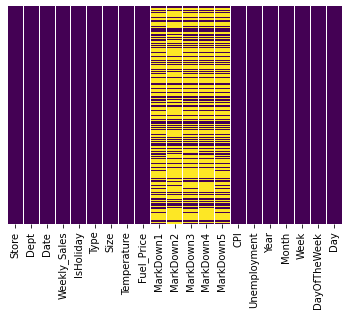

In [16]:
# To visulize it
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [17]:
dataset_missing = (dataset.isnull().sum() / len(dataset)).sort_values(ascending = False)
dataset_missing.head()

MarkDown2    0.736110
MarkDown4    0.679847
MarkDown3    0.674808
MarkDown1    0.642572
MarkDown5    0.640790
dtype: float64

Remove the missing values with more than 60% from the whole variable.

In [18]:
dataset_missing_ = dataset_missing.index[dataset_missing > 0.6]

all_missing = list(set(dataset_missing_))
print('There are %d columns with more than 60%% missing values' % len(all_missing))
dataset = dataset.drop(columns = all_missing)
print('Data shape: ', dataset.shape)

There are 5 columns with more than 60% missing values
Data shape:  (421570, 16)


In [19]:
dataset.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Week            0
DayOfTheWeek    0
Day             0
dtype: int64

## 3.3 Feature Selection

In [30]:
corr = dataset.corr()
corr.shape

(15, 15)

<AxesSubplot:>

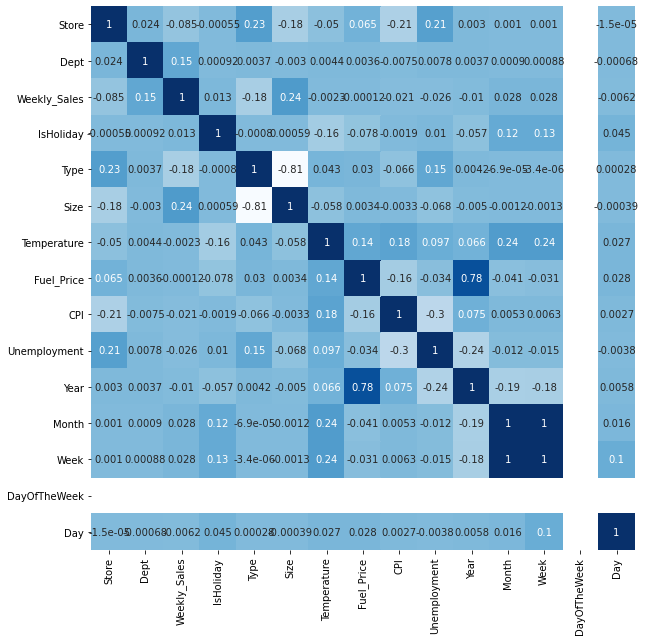

In [31]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=False, square= True, annot=True, cmap='Blues')

From the above heat map, we can obtained thre's a soiginificant relationship betwen Year, Fuel_price, Month, Week, Type and Size. Therefore, instead of using 6 varibales we will keep the Fuel_price, Month and Type in the analysis and rest of them will remove.

In [83]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [84]:
corr_features = correlation(dataset, 0.7)
len(set(corr_features))

3

In [85]:
corr_features

{'Size', 'Week', 'Year'}

In [87]:
dataset.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month',
       'Week', 'DayOfTheWeek', 'Day'],
      dtype='object')

This function also suggesting the above conclusion.

In [20]:
dataset.drop(dataset[['Size', 'Week', 'Year']], axis =1, inplace = True)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   CPI           421570 non-null  float64       
 9   Unemployment  421570 non-null  float64       
 10  Month         421570 non-null  int64         
 11  DayOfTheWeek  421570 non-null  int64         
 12  Day           421570 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(5), int64(6)
memory usage: 42.2 MB


In [22]:
dataset.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Month',
       'DayOfTheWeek', 'Day'],
      dtype='object')

## 3.4 Feature Importance

In [23]:
X = dataset[['Store', 'Dept', 'IsHoliday', 'Type',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Month',
       'DayOfTheWeek', 'Day']]
y = dataset['Weekly_Sales']

In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [29]:
import xgboost as xgb

train_y = dataset['Weekly_Sales']
train_X = dataset.drop(["Weekly_Sales", "Date"], axis=1)

xgb_params = {
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
}

[11:34:12] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[11:34:12] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




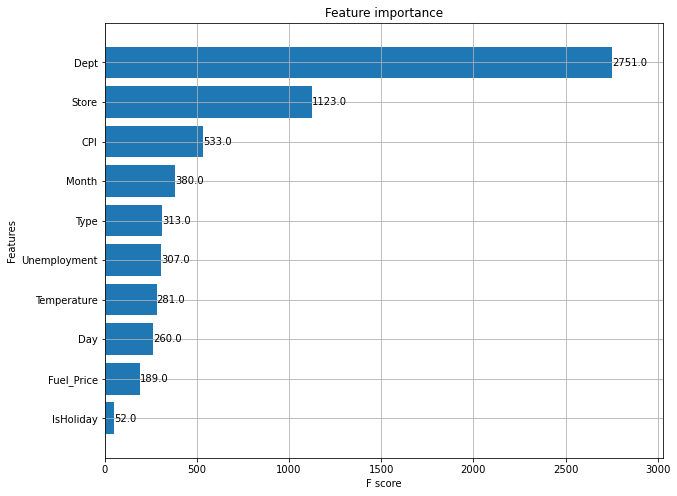

In [103]:
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)
remain_num = 99

fig, ax = plt.subplots(figsize=(10,8))
xgb.plot_importance(model, max_num_features=remain_num, height=0.8, ax=ax)
plt.show()

## 3.5 Dealing with outliers

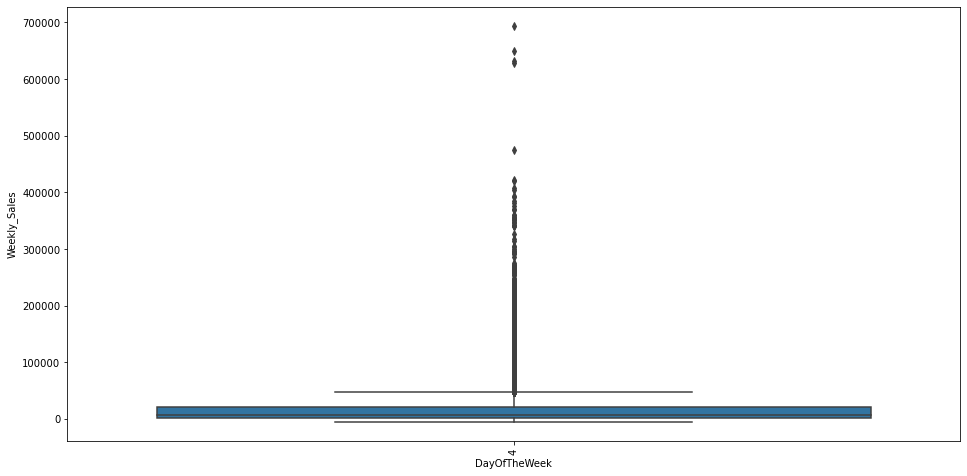

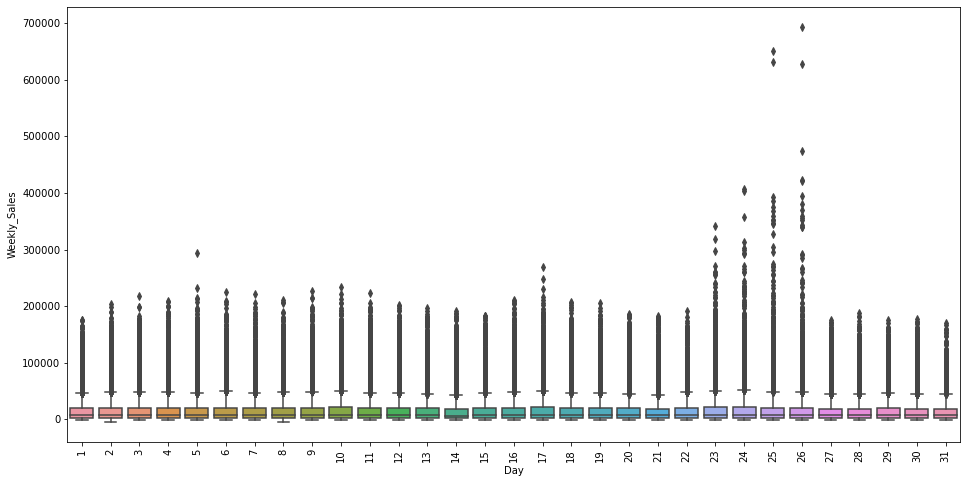

In [106]:
def box_plot_dist_var(var):
#     var = 'DayOfTheWeek'
    data_ = pd.concat([dataset['Weekly_Sales'], dataset[var]], axis=1)
    f, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(x=var, y="Weekly_Sales", data=data_)
    plt.xticks(rotation=90);

box_plot_dist_var("DayOfTheWeek")        
box_plot_dist_var("Day")  

In [107]:
dataset_ts = dataset.groupby(['Date','Store','Dept','CPI'])['Weekly_Sales'].sum().reset_index()
dataset_ts.shape

(421570, 5)

## 3.6 Transform the data

In [25]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
### fit vs fit_transform
X=scaler.fit_transform(X)

# 4. Model Fitting

## 4.1 ARIMA Model

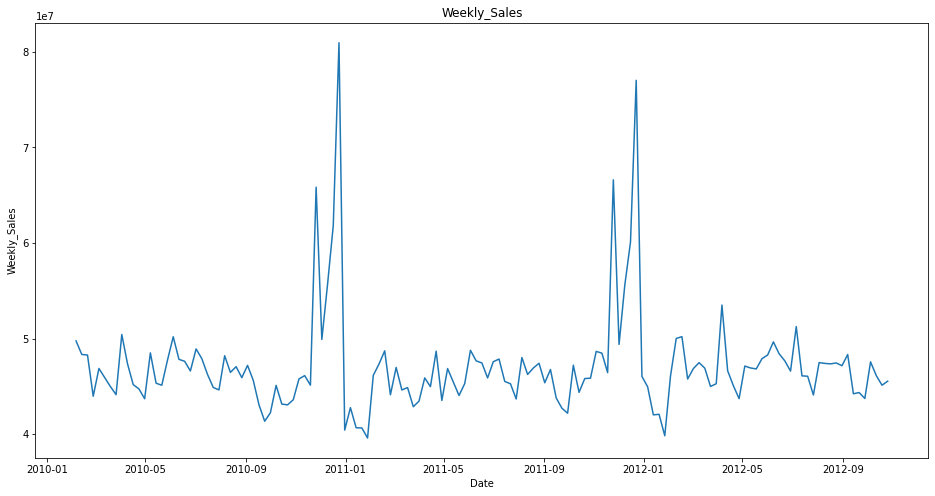

In [108]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts=dataset_ts.groupby(["Date"])["Weekly_Sales"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Weekly_Sales')
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.plot(ts);

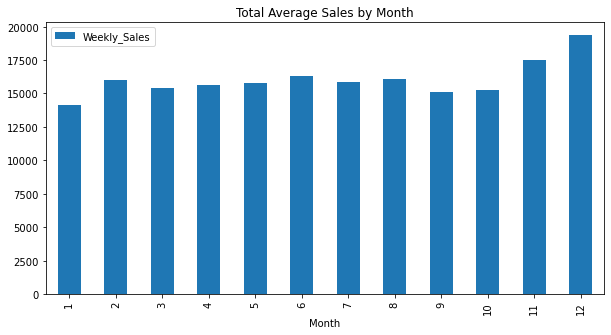

In [109]:
#Monthly growth
gouped_monthly = dataset.groupby('Month')['Weekly_Sales'].mean().T
# gouped_monthly
gouped_monthly.plot(kind='bar',title='Total Average Sales by Month',figsize=(10,5))
plt.legend(loc='best')
plt.show()

In [111]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 7.1 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [ ]:
### Auto Arima 30 days
import pmdarima as pm
from pmdarima import auto_arima
model_ar = auto_arima(dataset.Weekly_Sales, trace=True, error_action='ignore', suppress_warnings=True)
model_ar.fit(dataset.Weekly_Sales)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8632697.337, Time=142.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8721973.283, Time=7.63 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8667683.308, Time=15.85 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8640411.192, Time=24.66 sec


## 4.2 XG Boost Model

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [31]:
xgb_model = xgb.XGBRegressor(n_estimators=500)
xgb_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [33]:
pred = xgb_model.predict(X_test)

In [35]:
pred

array([-2086.6165, -3429.5938,  3593.3916, ...,  2544.0754,  5532.3433,
       -3662.9443], dtype=float32)

In [38]:
pd.DataFrame(pred, columns=['pred'])

,pred
0,-2086.616455
1,-3429.593750
2,3593.391602
3,29509.322266
4,42076.851562
...,...
126466,-821.633240
126467,39554.855469
126468,2544.075439
126469,5532.343262


In [43]:
X_test.shape

(126471, 11)

In [44]:
from sklearn import metrics

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 2321.193857944512
MSE: 20799785.81675144
RMSE: 4560.678218944134


In [48]:
# Testing Score
print("Testing Accuracy:",xgb_model.score(X_test,y_test)*100)

Testing Accuracy: 95.97542387558285


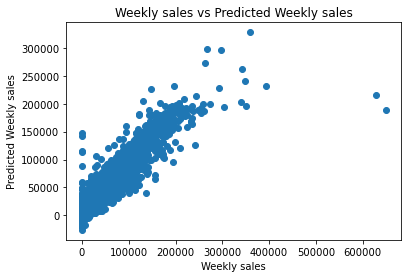

In [49]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, pred)
plt.xlabel("Weekly sales")
plt.ylabel("Predicted Weekly sales")
plt.title("Weekly sales vs Predicted Weekly sales")
plt.show()